This notebook reproduces the training and plotting of SOM of Modified Gravity theories probed by cosmic shear, shown in https://arxiv.org/abs/2110.13171.

The MG theories considered here are f(R) gravity, dilaton and symmetron.  
You will need sompy (probably need to clone it from their repository https://github.com/sevamoo/SOMPY rather than pip install.)

In [1]:
import sys
sys.path

['',
 '/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages',
 '/share/software/user/open/python/3.6.1/lib/python36.zip',
 '/share/software/user/open/python/3.6.1/lib/python3.6',
 '/share/software/user/open/python/3.6.1/lib/python3.6/lib-dynload',
 '/home/users/aferte/.local/lib/python3.6/site-packages',
 '/home/users/aferte/.local/lib/python3.6/site-packages/SOMPY-1.1.1-py3.6.egg',
 '/share/software/user/open/python/3.6.1/lib/python3.6/site-packages',
 '/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/IPython/extensions',
 '/home/users/aferte/.ipython']

In [2]:
sys.path.append("/home/users/aferte/.local/lib/python3.6/site-packages")

In [3]:
import sompy

CACHEDIR=/home/users/aferte/.cache/matplotlib
Using fontManager instance from /home/users/aferte/.cache/matplotlib/fontlist-v330.json
Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

# 1. Read training set

In [46]:
#Read xi_pm for all MG models
all_mg_data = np.load('training_set/som_mg_training_all.npy')

In [10]:
print('There are '+str(all_mg_data.shape[0])+' theoretical predictions of tomographic cosmic shear flattened to 1D vector of '+str(all_mg_data.shape[1])+' elements.')

There are 500 theoretical predictions of tomographic cosmic shear flattened to 1D vector of 45375 elements.


In [48]:
#Read the values of the MG parameters for each theory

#b0 values for f(R) gravity
fr_b0_all = np.load('training_set/som_mg_training_fr_b0_vfinale.npy')

#xi0 values for dilaton (beta0 = 2.2)
dil_xi0_beta22 = np.load('training_set/som_mg_training_dil_xi0_beta22_tightrange_vfinale.npy')

#xistar values for symmetron with betastar of 0.5, 1 and 1.5 (astar = 0.5) 
sym_xis_beta05 = np.load('training_set/som_mg_training_sym_xis_beta05_tightrange_vfinale.npy')
sym_xis_beta1  = np.load('training_set/som_mg_training_sym_xis_beta1_tightrange_vfinale.npy')
sym_xis_beta15 = np.load('training_set/som_mg_training_sym_xis_beta15_tightrange_vfinale.npy')

# 2. Train SOM 

In [49]:
#dimension of the 2D grid
som_size_x = 6
som_size_y = 6

In [50]:
#Train the SOM on all MG models
som_mg = sompy.SOMFactory.build(all_mg_data, mapsize=[som_size_x,som_size_y], mapshape='planar', lattice='rect', initialization='pca') 
som_mg.train(n_job=4, shared_memory = 'no')

 Training...
 pca_linear_initialization took: 1.675000 seconds
 Rough training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 3

 epoch: 1 ---> elapsed time:  0.269000, quantization error: 7333.571836

 epoch: 2 ---> elapsed time:  0.256000, quantization error: 53.213521

 epoch: 3 ---> elapsed time:  0.258000, quantization error: 31.890314

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 3

 epoch: 1 ---> elapsed time:  0.271000, quantization error: 27.930432

 epoch: 2 ---> elapsed time:  0.257000, quantization error: 27.131113

 epoch: 3 ---> elapsed time:  0.257000, quantization error: 26.393298

 Final quantization error: 26.263908
 train took: 4.244000 seconds


# 3. Plot SOM 

In [51]:
#From BMU to coordinate x,y
som_xy = som_mg.bmu_ind_to_xy(som_mg.project_data(all_mg_data))
x,y = np.zeros(len(som_xy)),np.zeros(len(som_xy))

k=0
for i in som_xy:
    x[k]=i[0]
    y[k]=i[1]
    k+=1

#Initialize grid of number of models 
dens_all = np.zeros([som_size_x,som_size_y])
#Initialize grid of number of models per MG theories
dens_b0 = np.zeros([som_size_x,som_size_y])
dens_dil_xi0_beta22 = np.zeros([som_size_x,som_size_y])
dens_sym_xi_beta05  = np.zeros([som_size_x,som_size_y])
dens_sym_xi_beta1   = np.zeros([som_size_x,som_size_y])
dens_sym_xi_beta15  = np.zeros([som_size_x,som_size_y])
#Initialize grid of MG parameters values
som_b0             = np.zeros([som_size_x,som_size_y])
som_dil_xi0_beta22 = np.zeros([som_size_x,som_size_y])
som_sym_xi_beta05  = np.zeros([som_size_x,som_size_y])
som_sym_xi_beta1   = np.zeros([som_size_x,som_size_y])
som_sym_xi_beta15  = np.zeros([som_size_x,som_size_y])



#number of models for each theory to index the grid.
n_model = 100

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)

        #Grid of the number of models per cell
        dens_all[i,j] = (np.sum(cell_coord))
        
        dens_b0[i,j] = np.sum(cell_coord[:n_model])
        dens_dil_xi0_beta22[i,j] = np.sum(cell_coord[n_model:n_model*2])
        dens_sym_xi_beta05[i,j]  = np.sum(cell_coord[n_model*2:n_model*3])
        dens_sym_xi_beta1[i,j]   = np.sum(cell_coord[n_model*3:n_model*4])
        dens_sym_xi_beta15[i,j]  = np.sum(cell_coord[n_model*4:n_model*5])
  
        #Grid of median of MG values per cell
        som_b0[i,j]             = (np.median(fr_b0_all[cell_coord[:n_model]]))
        som_dil_xi0_beta22[i,j] = (np.median(dil_xi0_beta22[cell_coord[n_model:n_model*2]]))
        som_sym_xi_beta05[i,j]  = (np.median(sym_xis_beta05[cell_coord[n_model*2:n_model*3]]))
        som_sym_xi_beta1[i,j]   = (np.median(sym_xis_beta1[cell_coord[n_model*3:n_model*4]]))
        som_sym_xi_beta15[i,j]  = (np.median(sym_xis_beta15[cell_coord[n_model*4:n_model*5]]))
        
        
        

/home/users/aferte/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/users/aferte/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [52]:
#To plot empty cells as white cells
dens_all[np.where(dens_all == 0.)] = float("NaN")


Plot the grid of number of models per cell - Figure 2 of the paper 

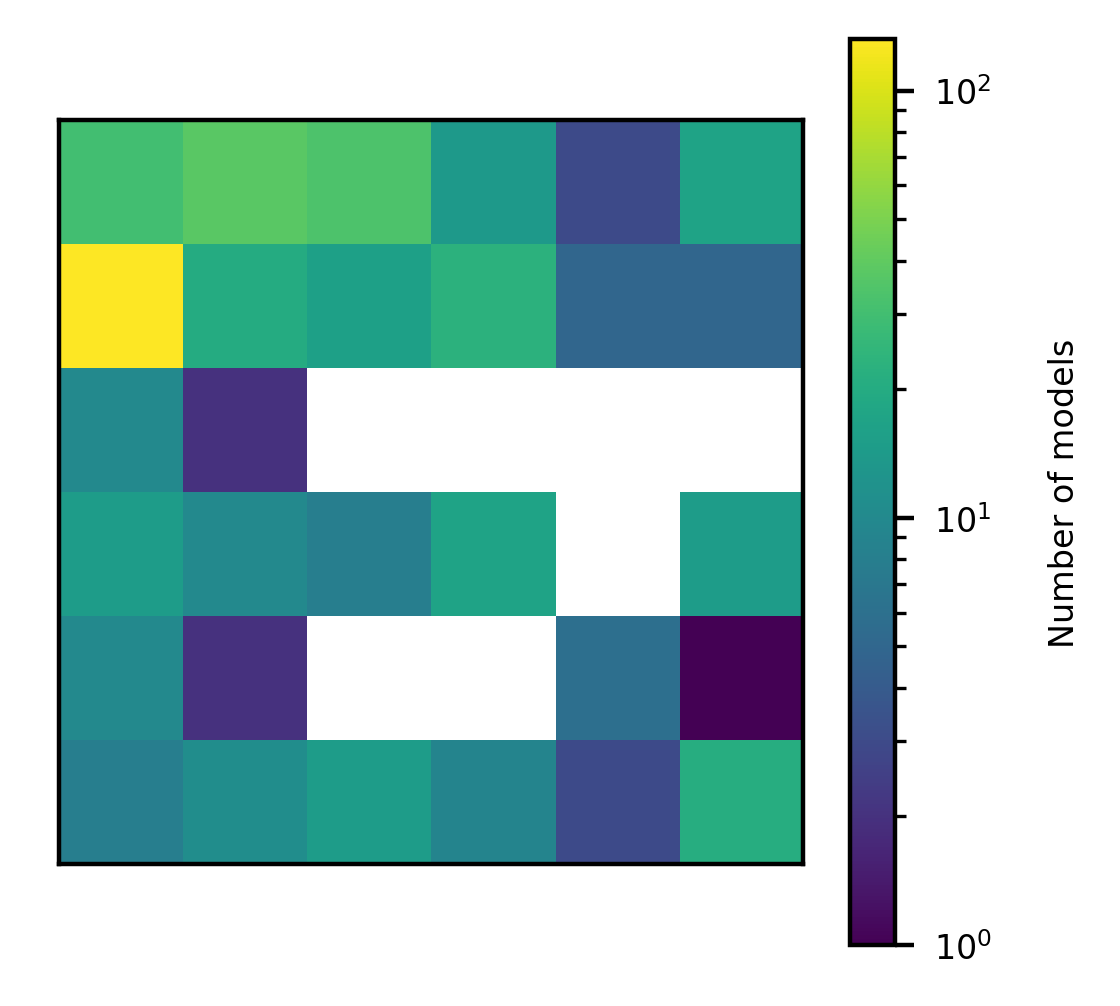

In [53]:
plt.figure(figsize=(3,3),dpi=400)
plt.imshow(dens_all, origin = 'lower',interpolation='none',norm=colors.LogNorm(vmin=np.nanmin(dens_all),vmax=np.nanmax(dens_all)))
plt.xticks([])
plt.yticks([])
cb = plt.colorbar()
cb.set_label(label='Number of models', size=6,labelpad=10)
cb.ax.tick_params(labelsize=6)
plt.show()

Plot the grid of values of the MG parameters per cell - Figure 2 of the paper 

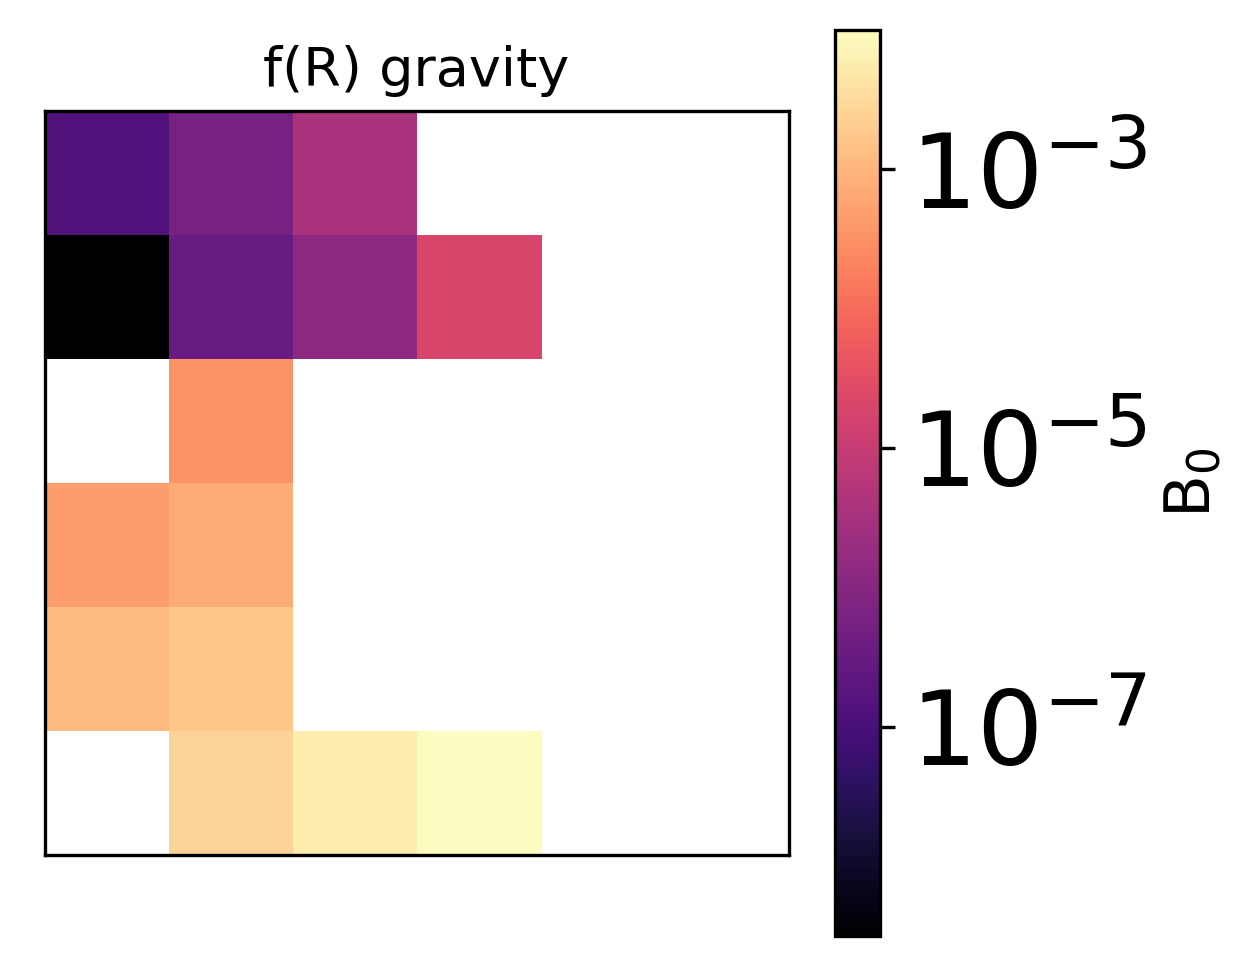

In [54]:
#f(R) gravity - left panel of Fig. 3
plt.figure(figsize=(4,4),dpi=300)
cf = plt.imshow(som_b0, origin = 'lower',norm=colors.LogNorm(vmin=np.nanmin(som_b0), vmax=np.nanmax(som_b0)),interpolation='none',cmap=plt.get_cmap('magma'))
cb = plt.colorbar(cf)   
plt.xticks([])
plt.yticks([])
plt.title('f(R) gravity',size=13)
cb.set_label(r'$\rm B_{0}$', size=15,labelpad=4)
plt.show()

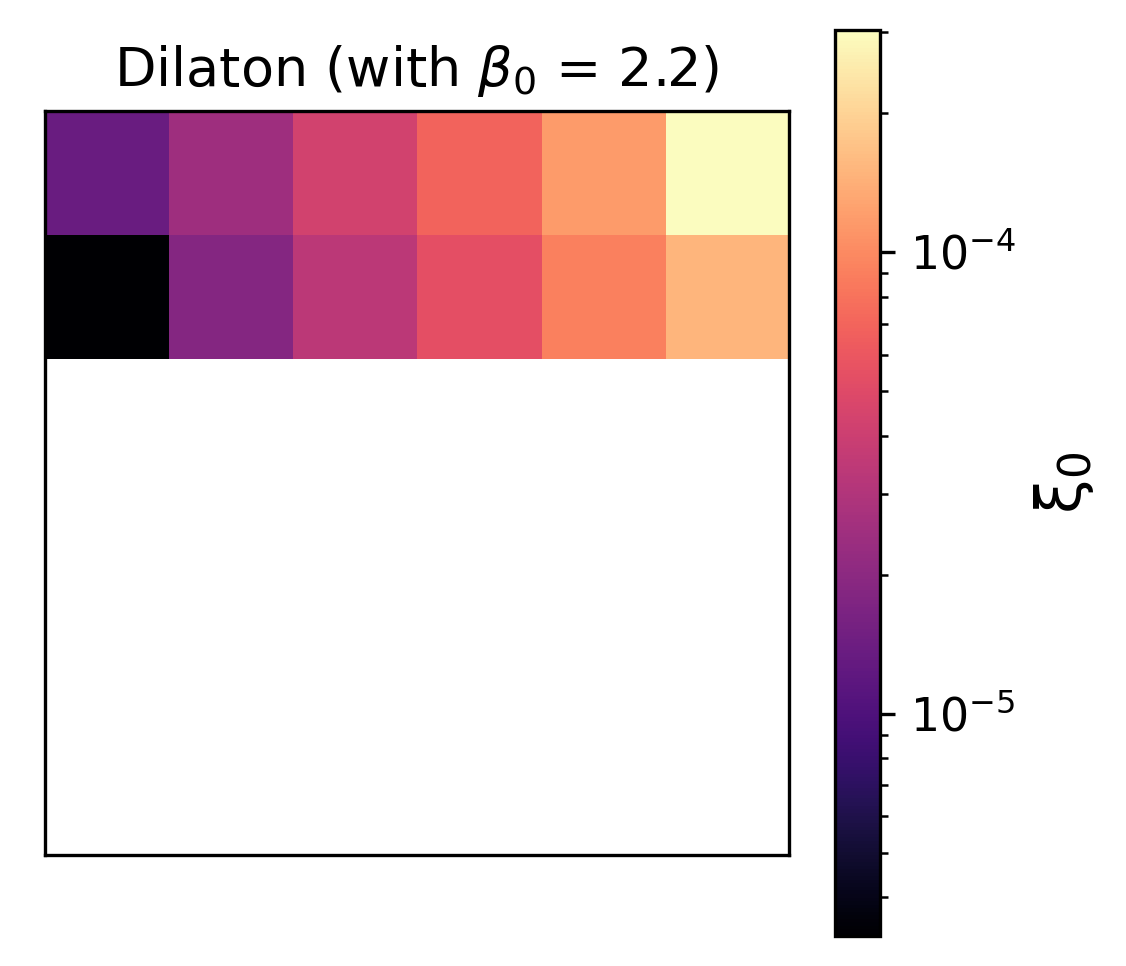

In [55]:
#Dilaton - middle panel of Fig. 3
plt.figure(figsize=(4,4),dpi=300)
cf = plt.imshow(som_dil_xi0_beta22, origin = 'lower',norm=colors.LogNorm(vmin=np.nanmin(som_dil_xi0_beta22), vmax=np.nanmax(som_dil_xi0_beta22)),interpolation='none',cmap=plt.get_cmap('magma'))
cb = plt.colorbar(cf)   
plt.xticks([])
plt.yticks([])
plt.title(r'Dilaton (with $\beta_0$ = 2.2)',size=13)
cb.set_label(r'$\rm \xi_{0}$', size=15,labelpad=4)
cb.ax.tick_params(labelsize=11)
plt.show()

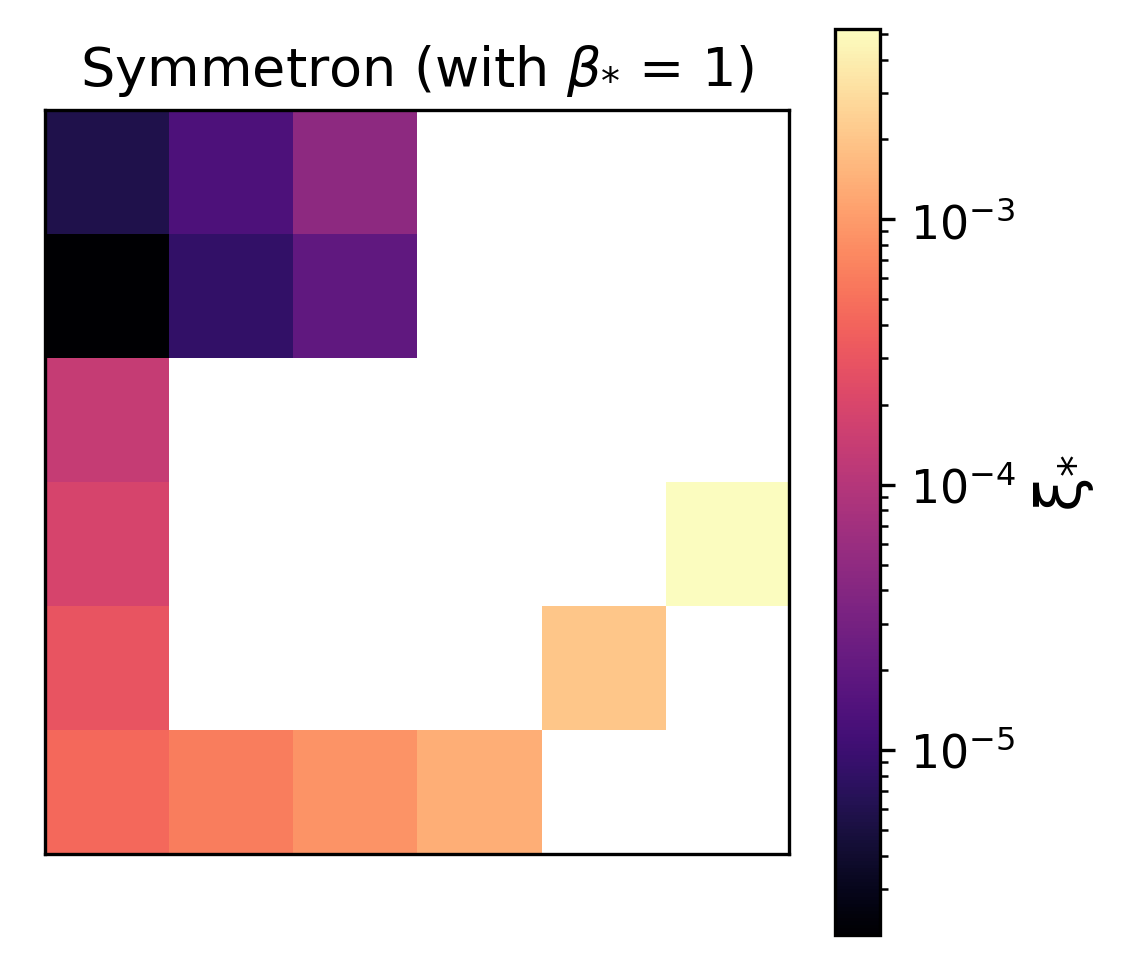

In [56]:
#Symmetron (only for beta_star = 1) - right panel of Fig. 3
plt.figure(figsize=(4,4),dpi=300)
cf = plt.imshow(som_sym_xi_beta1, origin = 'lower',norm=colors.LogNorm(vmin=np.nanmin(som_sym_xi_beta1), vmax=np.nanmax(som_sym_xi_beta1)),interpolation='none',cmap=plt.get_cmap('magma'))
cb = plt.colorbar(cf)   
plt.xticks([])
plt.yticks([])
plt.title(r'Symmetron (with $\beta_{*}$ = 1)',size=13)
cb.set_label(r'$\rm \xi_{*}$', size=15,labelpad=4)
cb.ax.tick_params(labelsize=11)
plt.show()

# 4. Plot models 

Read all the correlation functions:

In [57]:
models=np.zeros([som_size_x,som_size_y],dtype=object)
x,y = np.zeros(len(som_xy)),np.zeros(len(som_xy))
k=0

for i in som_xy:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    
for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        models[i,j]=(all_mg_data[cell_coord])

In [58]:
data_vector_median_somcell = np.zeros([som_size_x,som_size_y],dtype=object)
for i in range(som_size_x):
    for j in range(som_size_y):
        data_vector_median_somcell[i,j] = np.mean(models[i,j],axis=0 ,dtype=np.float64)
data_vector_median_somcell = np.array(data_vector_median_somcell)

/home/users/aferte/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/users/aferte/.local/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Read theta values:

In [59]:
theta = np.load('training_set/theta_xip.npy')

Plot xi_+^22 for selected models:

In [60]:
!pip install astropy

Defaulting to user installation because normal site-packages is not writeable


In [61]:
#ordering = xi_+ ^bin 11 , xi_+ ^bin 21, xi_+ ^bin 22,   xi_+  ^bin 31, ..., x- bin11, x- bin21

In [62]:
#Read covariance matrix
#LSST Y10 like
#bin 22, bin 22 block (which is 1 1 1 1 in the output (bins start at 0))
covariance_lsst = np.genfromtxt('covariance/lsst_ssss_++_cov_Ntheta26_Ntomo10_506')

auto = (covariance_lsst[:,2] == covariance_lsst[:,3])
theta_bin = covariance_lsst[auto,2]*60.*180./np.pi
sigma_lsst = np.sqrt(covariance_lsst[auto,-2])



In [63]:
import matplotlib.pyplot as plt
from scipy import interpolate
gr_interp = interpolate.interp1d(theta,data_vector_median_somcell[4,0][765*2:765*2+765])

In [64]:
theta_bin_range = (theta_bin > 30.) & (theta_bin < 300.) 

<Figure size 432x288 with 0 Axes>

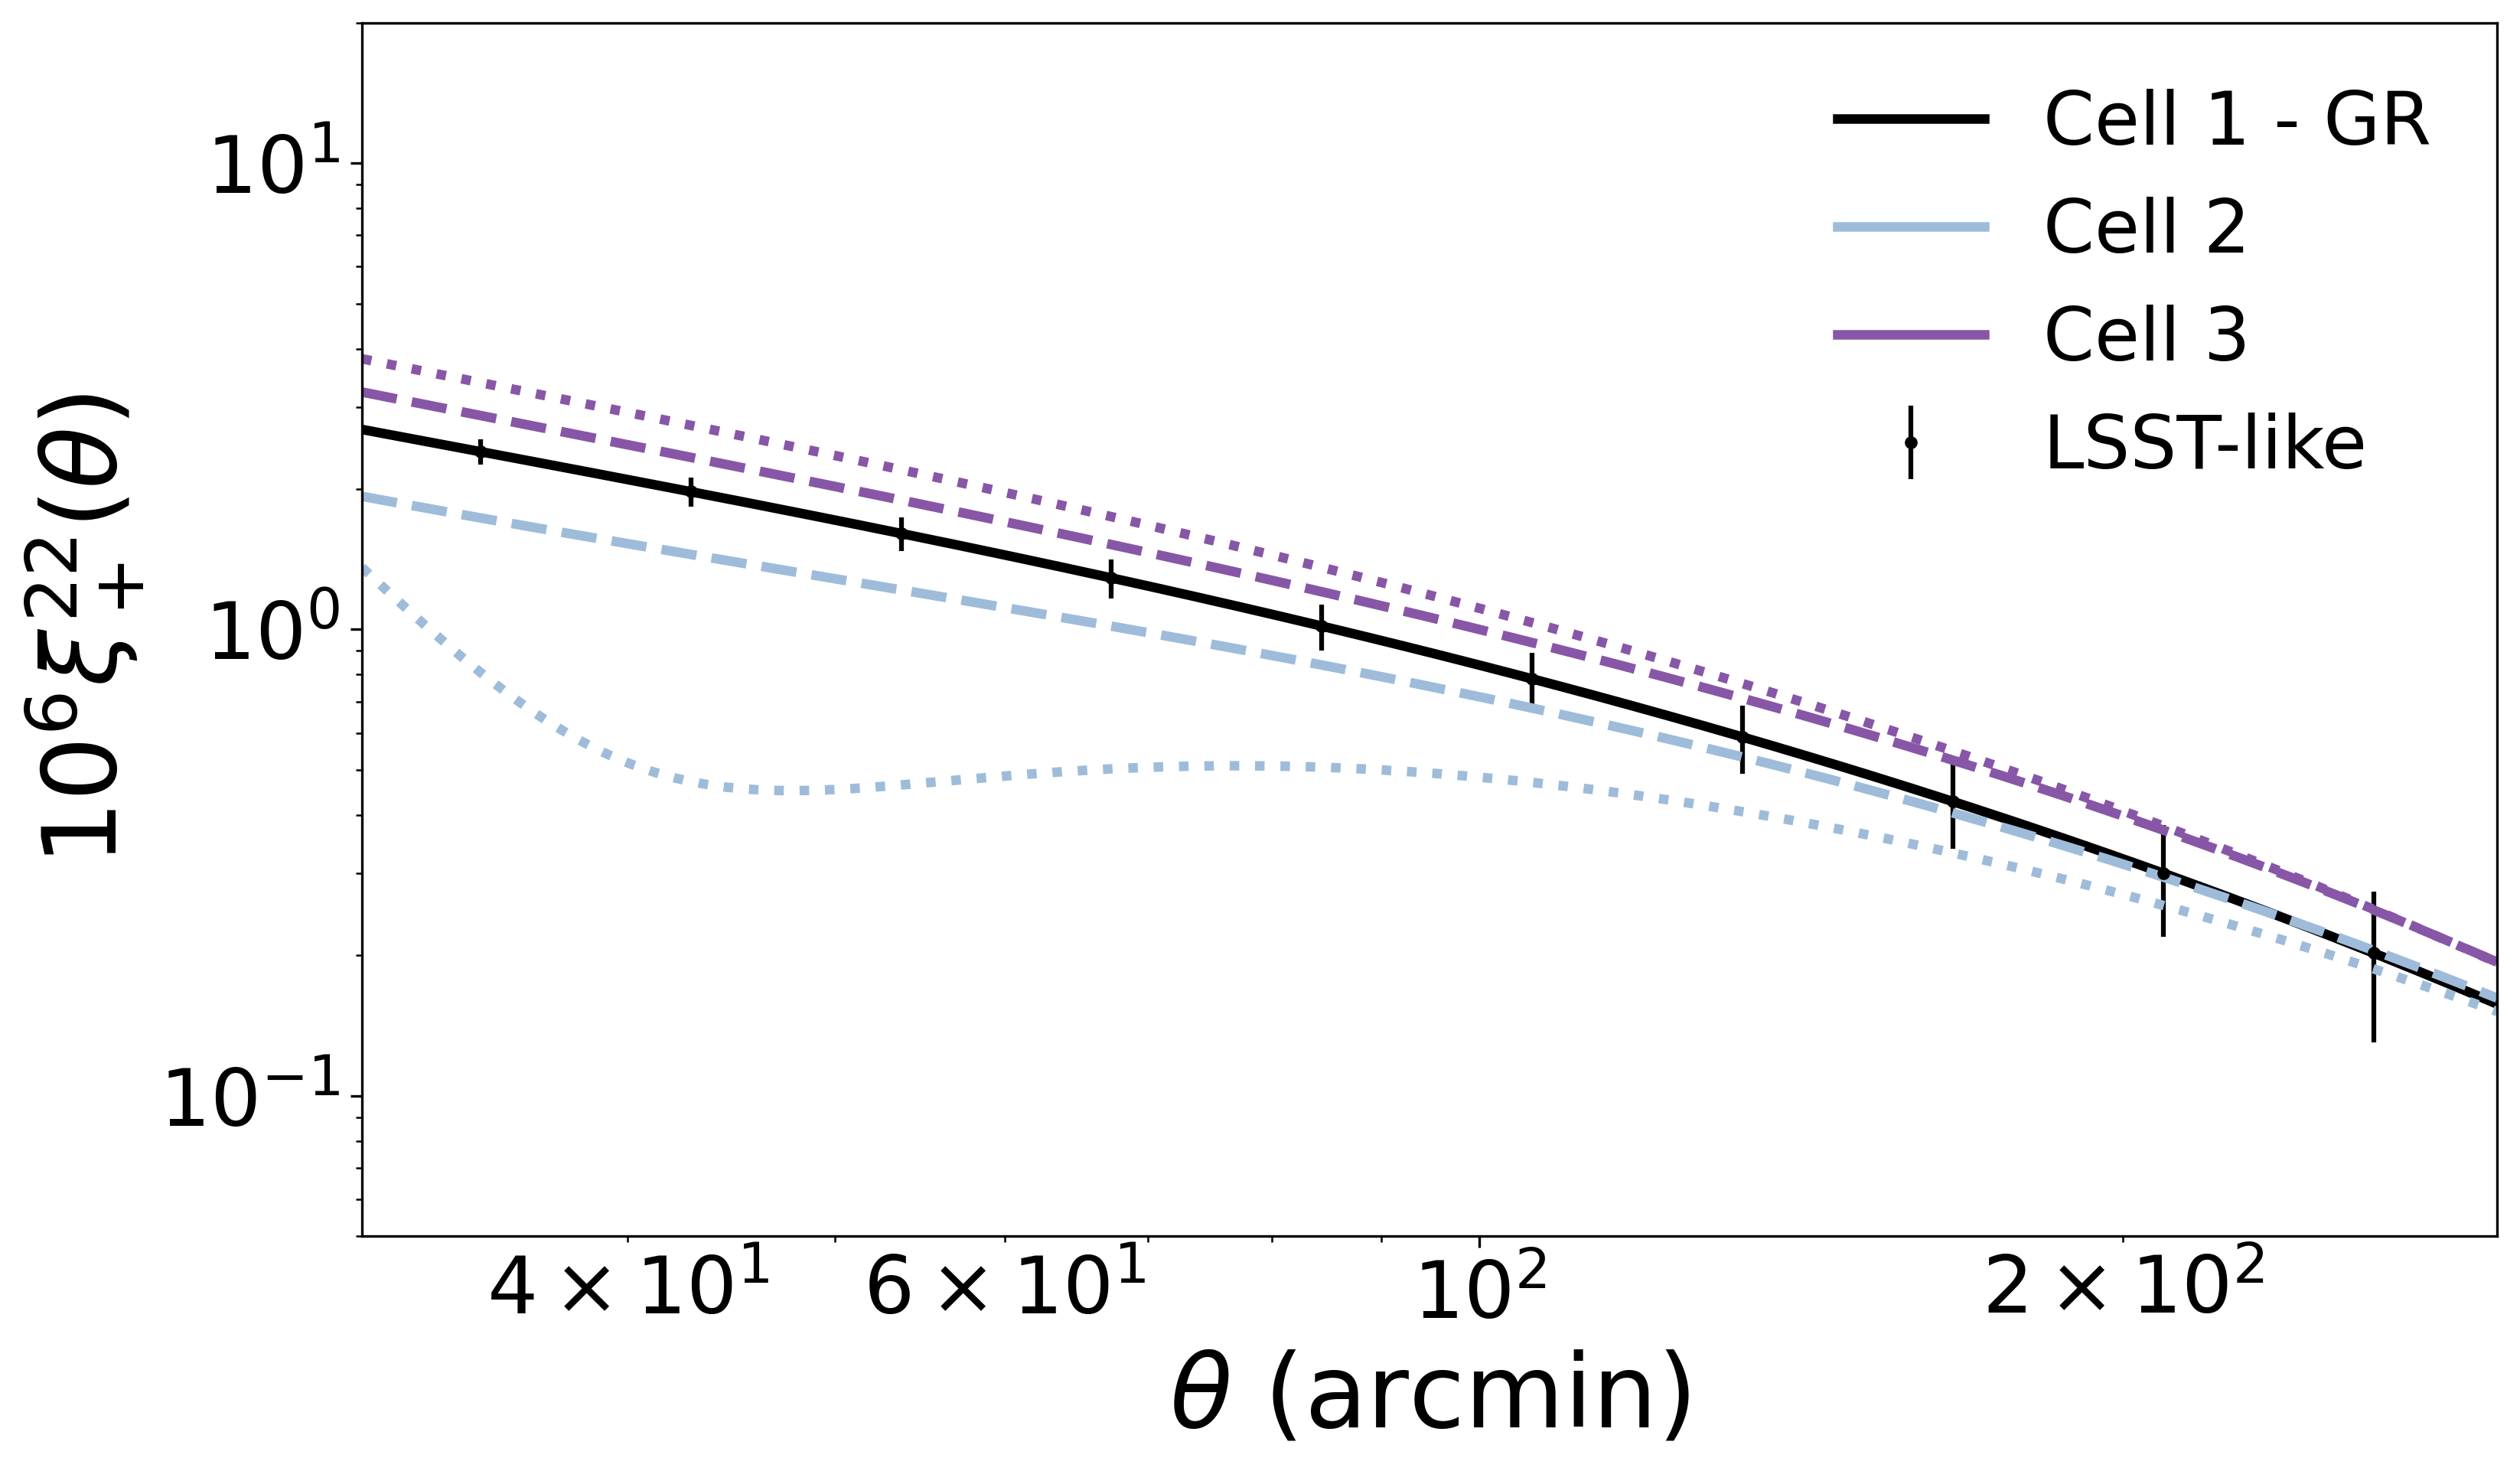

In [65]:
import matplotlib
plt.clf()
plt.figure(figsize=(12,7),dpi=300)
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)


plt.plot(theta,10.**6*data_vector_median_somcell[4,0][765*2:765*2+765],label='Cell 1 - GR',color='black',linewidth=3)
plt.errorbar(theta_bin[theta_bin_range],10.**6*gr_interp(theta_bin[theta_bin_range]),yerr=10.**6*sigma_lsst[theta_bin_range],fmt='.',color='black',label='LSST-like')

plt.plot(1,1,label='Cell 2',color='#9ebcda',linewidth=3)
plt.plot(theta,10.**6*models[5,5][0][765*2:765*2+765],linestyle='dashed',color='#9ebcda',linewidth=3)
plt.plot(theta,10.**6*models[5,5][16][765*2:765*2+765],linestyle='dotted',color='#9ebcda',linewidth=3)

plt.plot(1,1,label='Cell 3',color='#8856a7',linewidth=3)
plt.plot(theta,10.**6*models[0,5][0][765*2:765*2+765],linestyle='dashed',color='#8856a7',linewidth=3)
plt.plot(theta,10.**6*models[0,5][20][765*2:765*2+765],linestyle='dotted',color='#8856a7',linewidth=3)
plt.ylabel(r'$10^6 \xi^{22}_+(\theta)$',fontsize=32)
plt.ylim(5*1e-2,20.)
plt.xlim(np.min(theta),np.max(theta))
plt.legend(fontsize=23,frameon=False)
plt.yscale('log')
plt.xscale('log')

plt.xscale('log')
plt.xlim(np.min(theta),np.max(theta))
plt.xlabel(r'$\theta $ (arcmin)',fontsize=32)

plt.show()


# 5. Application to (w0,wa) 

Read w0,wa models

In [67]:
w0wa_apriori = np.load('training_set/test_gr.npy') 

In [69]:
w0wa_all_mg = np.concatenate((all_mg_data,w0wa_apriori),axis=0)

Read MG models 

In [75]:
#We train the SOM on the training set with linearly varied MG parameters
#but we project MG models for randomly sampled MG parameters values on the SOM
fr_apriori    = np.load('training_set/som_mg_apriori_fr_vfinale.npy')
dil_apriori = np.load('training_set/som_mg_apriori_dilaton_vfinale.npy')
sym_apriori = np.load('training_set/som_mg_apriori_symmetron_vfinale.npy')
sym_apriori_05 = np.load('training_set/som_mg_apriori_symmetron_beta05_vfinale.npy')
sym_apriori_15 = np.load('training_set/som_mg_apriori_symmetron_beta15_vfinale.npy')

Train with w0,wa

In [76]:
som_size_x=6
som_size_y=6

som_mg = sompy.SOMFactory.build(w0wa_all_mg, mapsize=[som_size_x,som_size_y], mapshape='planar', lattice='rect', initialization='pca') 
som_mg.train(n_job=4, shared_memory = 'no')



 Training...
 pca_linear_initialization took: 1.956000 seconds
 Rough training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 2

 epoch: 1 ---> elapsed time:  0.272000, quantization error: 8238.261952

 epoch: 2 ---> elapsed time:  0.264000, quantization error: 67.714551

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 3

 epoch: 1 ---> elapsed time:  0.263000, quantization error: 45.024506

 epoch: 2 ---> elapsed time:  0.379000, quantization error: 41.528055

 epoch: 3 ---> elapsed time:  0.266000, quantization error: 41.563281

 Final quantization error: 40.557006
 train took: 4.486000 seconds


SOM and plots

<Figure size 432x288 with 0 Axes>

<Figure size 600x600 with 0 Axes>

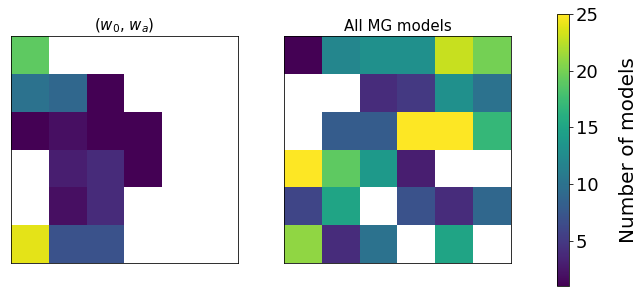

In [77]:
som_all = som_mg.bmu_ind_to_xy(som_mg.project_data(w0wa_all_mg))

x,y = np.zeros(len(som_all)),np.zeros(len(som_all))
k=0
for i in som_all:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#number of models
dens_w0wa = np.zeros([som_size_x,som_size_y])
dens_mg = np.zeros([som_size_x,som_size_y])
n_model_w0wa = 96

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_w0wa[i,j] = (np.sum(cell_coord[-n_model_w0wa:]))
        dens_mg[i,j] = (np.sum(cell_coord[:-n_model_w0wa]))

dens_w0wa_apriori = np.copy(dens_w0wa)
dens_w0wa_apriori[np.where(dens_w0wa == 0.)] = float("NaN")

dens_mg_all = np.copy(dens_mg)
dens_mg_all[np.where(dens_mg == 0.)] = float("NaN")


plt.clf()
plt.figure(figsize=(3,3),dpi=200)

fig, (ax, ax2, cax) = plt.subplots(ncols=3,figsize=(10,5), 
                  gridspec_kw={"width_ratios":[1,1,0.05]})
fig.subplots_adjust(wspace=0.3)


im1 = ax.imshow(dens_w0wa_apriori, origin = 'lower', vmax=25.,interpolation='none')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'($w_0$, $w_a$)', size=15)

im2 = ax2.imshow(dens_mg_all, origin = 'lower',vmax=25.,interpolation='none')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(r'All MG models', size=15)


cb = plt.colorbar(im2,cax=cax)   
cb.set_label(r'Number of models',size=20,labelpad=20)
cb.ax.tick_params(labelsize=18)

plt.show()

/home/users/aferte/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/users/aferte/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


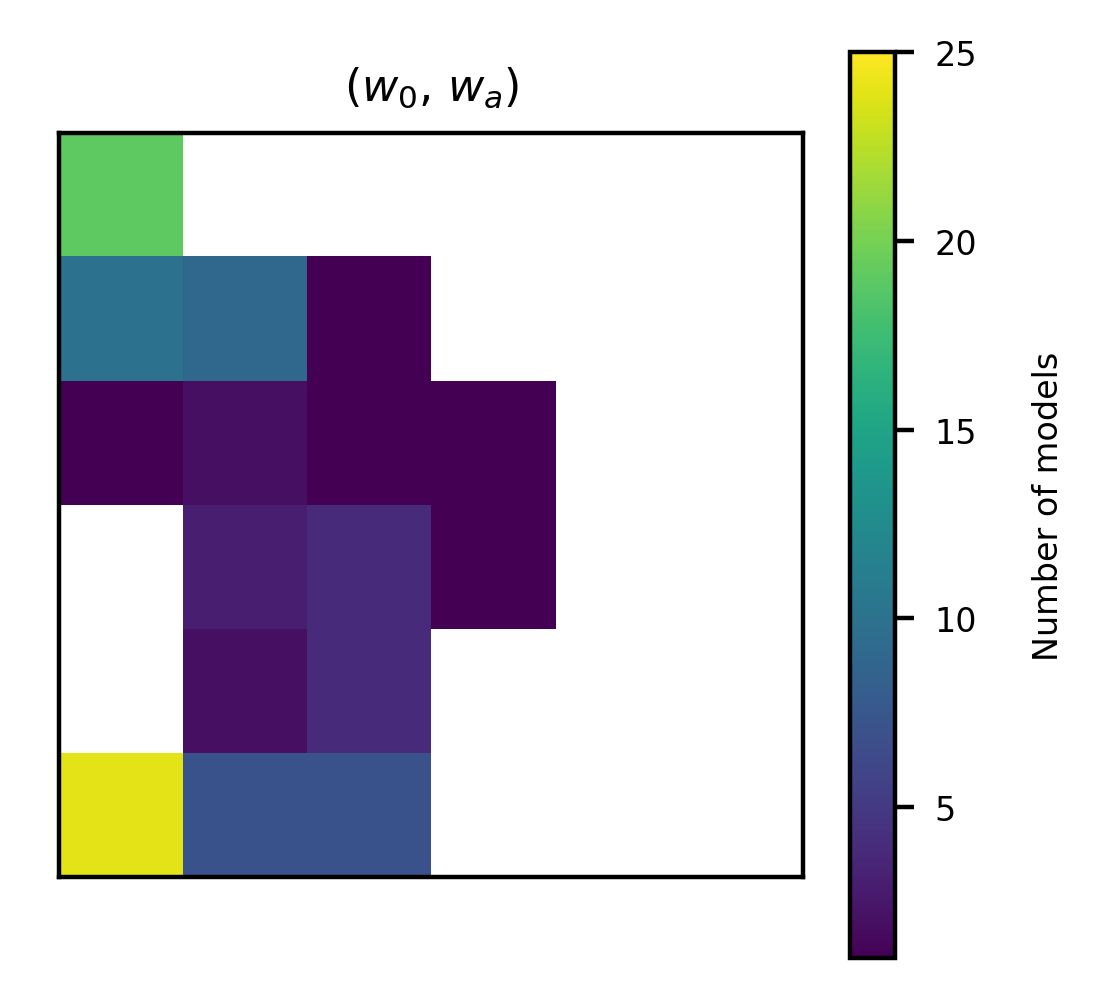

In [78]:
som_w0wa = som_mg.bmu_ind_to_xy(som_mg.project_data(w0wa_apriori))

x,y = np.zeros(len(som_w0wa)),np.zeros(len(som_w0wa))
k=0
for i in som_w0wa:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#number of models
dens_w0wa = np.zeros([som_size_x,som_size_y])
som_w0 = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_w0wa[i,j] = (np.sum(cell_coord))
        som_w0[i,j]   = (np.median(sym_xis_beta1[cell_coord[n_model*3:n_model*4]]))

dens_w0wa_apriori = np.copy(dens_w0wa)
dens_w0wa_apriori[np.where(dens_w0wa == 0.)] = float("NaN")

plt.figure(figsize=(3,3),dpi=400)
plt.imshow(dens_w0wa_apriori, origin = 'lower',interpolation='none')
plt.xticks([])
plt.yticks([])
plt.clim(1,25)
cb = plt.colorbar()
cb.set_label(label='Number of models', size=6,labelpad=10)
plt.title(r'($w_0$, $w_a$)', size=8)
cb.ax.tick_params(labelsize=6)
plt.show()

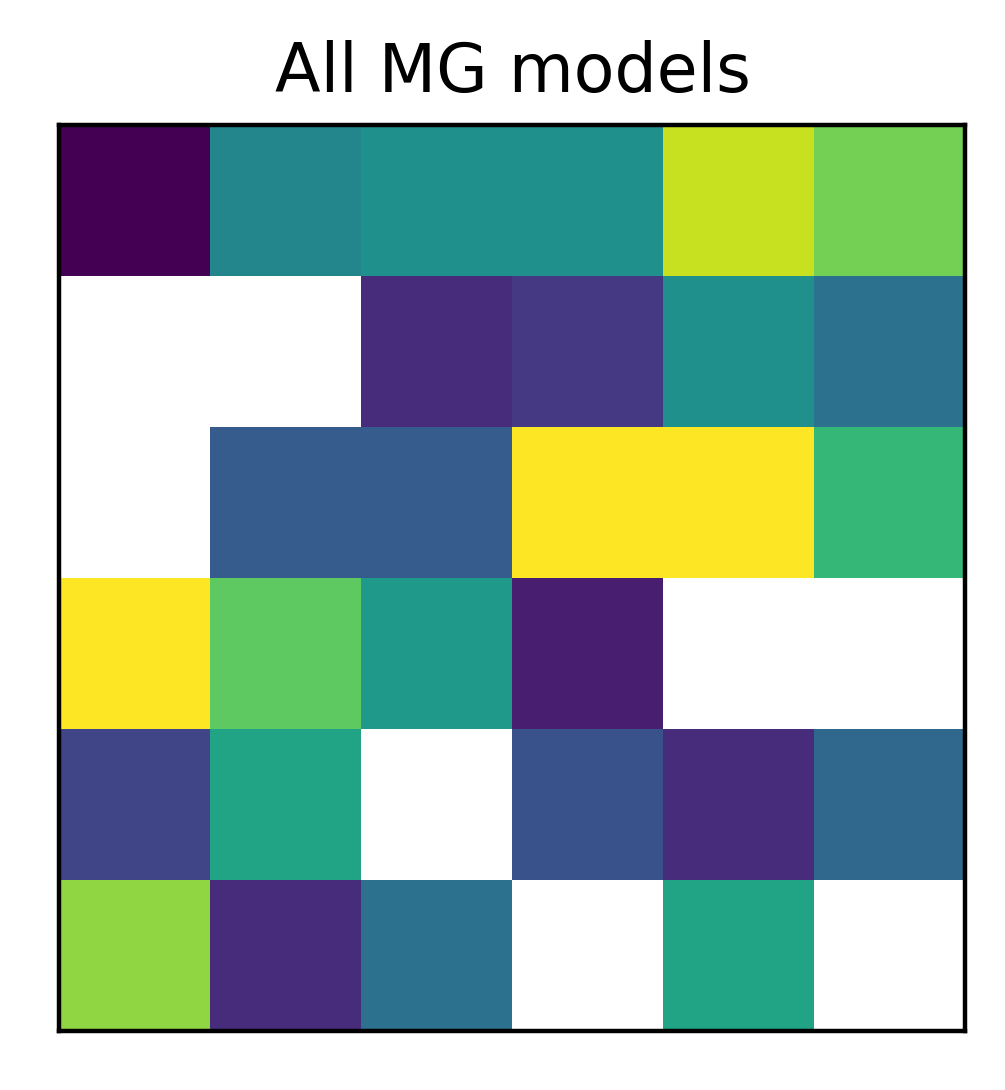

In [79]:
som_fr = som_mg.bmu_ind_to_xy(som_mg.project_data(all_mg_data))

x,y = np.zeros(len(som_fr)),np.zeros(len(som_fr))
k=0
for i in som_fr:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#number of models
dens_mg = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_mg[i,j] = (np.sum(cell_coord))

dens_mg_apriori = np.copy(dens_mg)
dens_mg_apriori[np.where(dens_mg == 0.)] = float("NaN")

plt.figure(figsize=(3,3),dpi=400)
plt.imshow(dens_mg_apriori, origin = 'lower',interpolation='none')
plt.xticks([])
plt.yticks([])
plt.clim(1,25)
plt.title('All MG models',size=12)
plt.show()

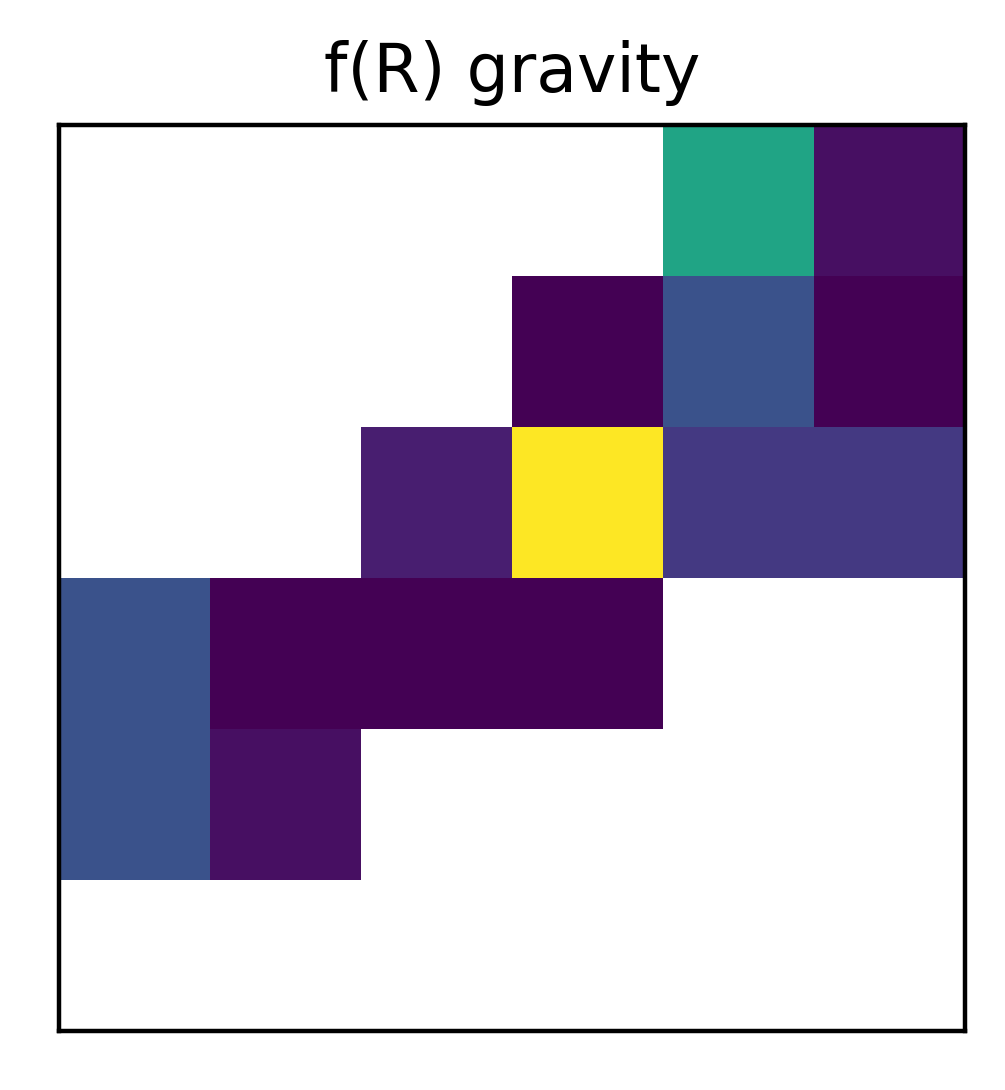

In [80]:
som_fr = som_mg.bmu_ind_to_xy(som_mg.project_data(fr_apriori))

x,y = np.zeros(len(som_fr)),np.zeros(len(som_fr))
k=0
for i in som_fr:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#number of models
dens_fr = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_fr[i,j] = (np.sum(cell_coord))

dens_fr_apriori = np.copy(dens_fr)
dens_fr_apriori[np.where(dens_fr == 0.)] = float("NaN")

  
plt.figure(figsize=(3,3),dpi=400)
plt.imshow(dens_fr_apriori, origin = 'lower',interpolation='none')
plt.xticks([])
plt.yticks([])
plt.clim(1,25)
plt.title('f(R) gravity',size=12)
plt.show()

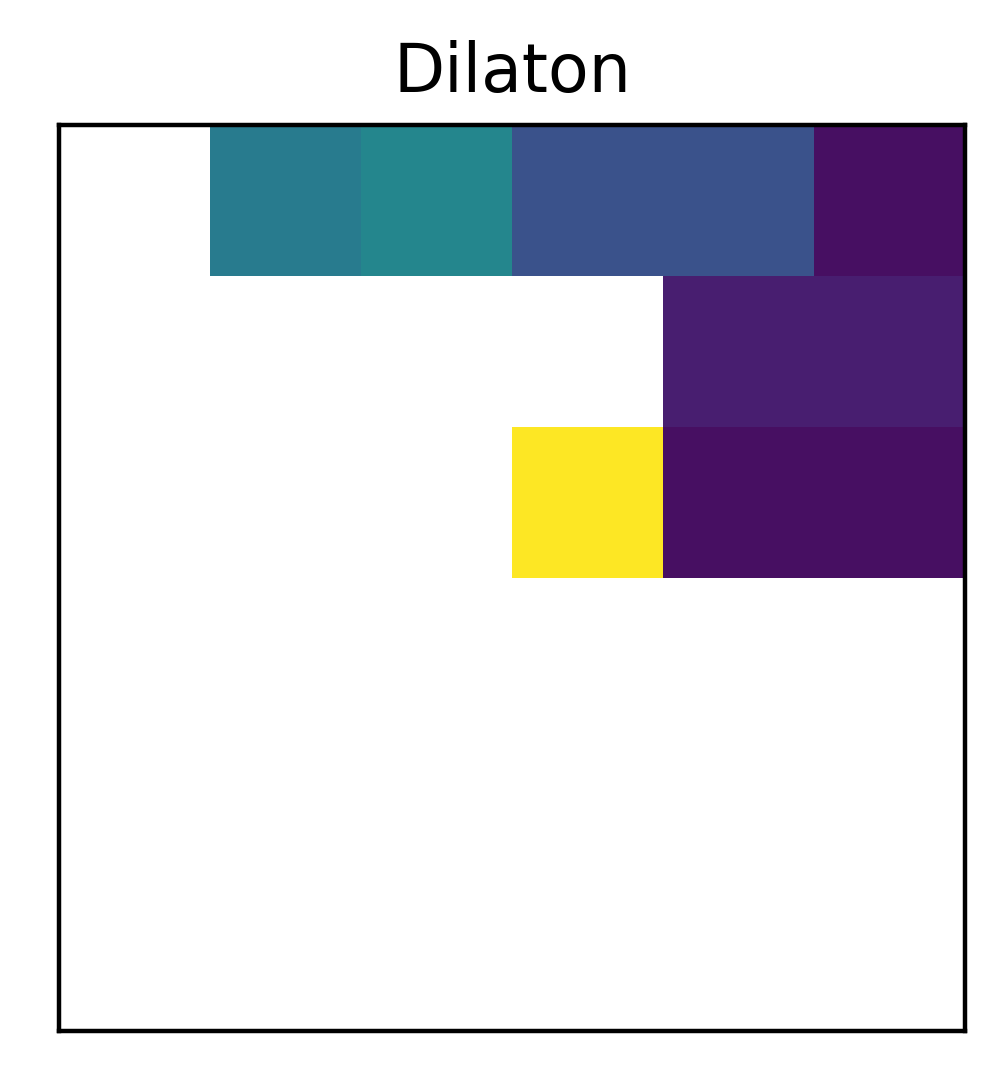

In [81]:
som_dil = som_mg.bmu_ind_to_xy(som_mg.project_data(dil_apriori))

x,y = np.zeros(len(som_dil)),np.zeros(len(som_dil))
k=0
for i in som_dil:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#number of models
dens_dil = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_dil[i,j] = (np.sum(cell_coord))

dens_dil_apriori = np.copy(dens_dil)
dens_dil_apriori[np.where(dens_dil == 0.)] = float("NaN")

  
plt.figure(figsize=(3,3),dpi=400)
plt.imshow(dens_dil_apriori, origin = 'lower',interpolation='none')
plt.xticks([])
plt.yticks([])
plt.clim(1,25)
plt.title('Dilaton',size=12)
# cb = plt.colorbar()
# cb.set_label(label='Number of models', size=6,labelpad=1)
# cb.ax.tick_params(labelsize=6)

plt.show()

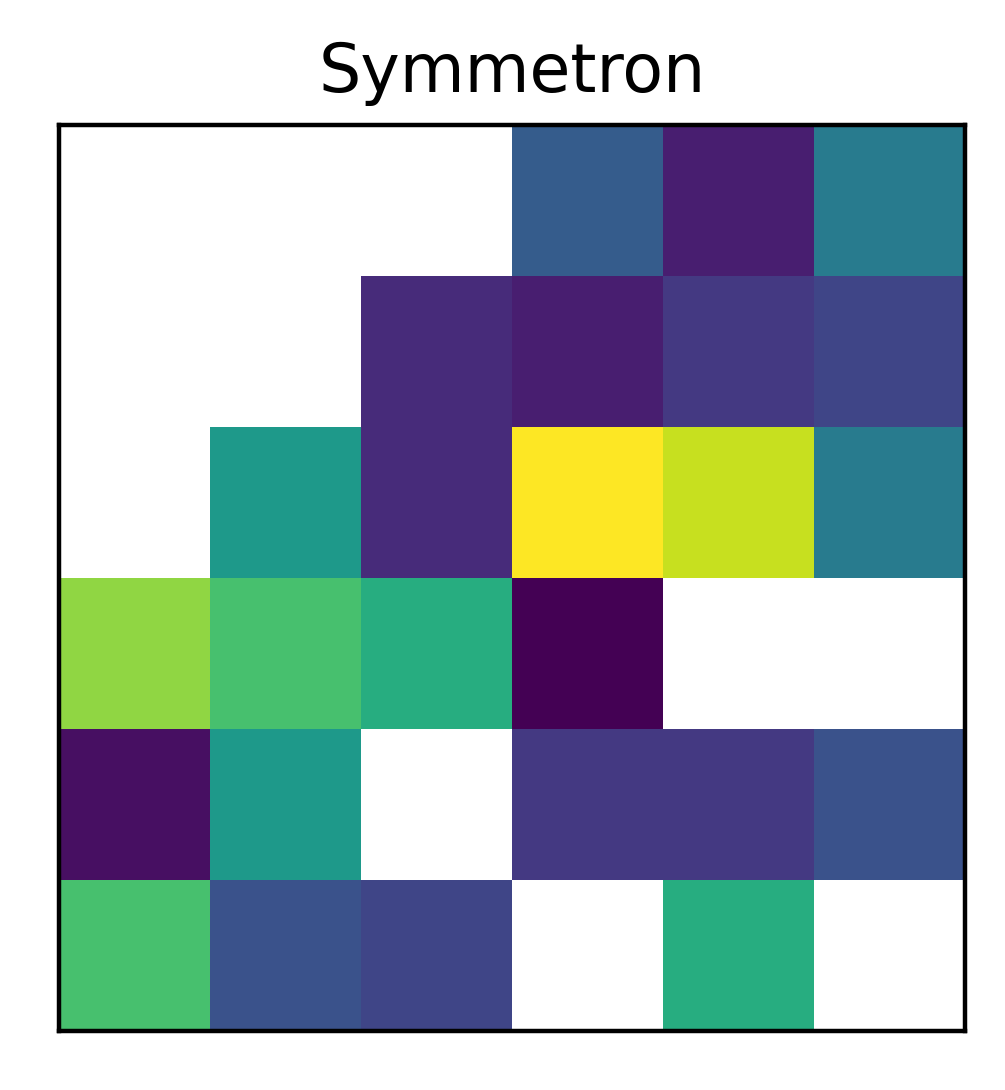

In [82]:
som_sym_beta05 = som_mg.bmu_ind_to_xy(som_mg.project_data(sym_apriori_05))

x,y = np.zeros(len(som_sym_beta05)),np.zeros(len(som_sym_beta05))
k=0
for i in som_sym_beta05:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#number of models
dens_sym05 = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_sym05[i,j] = (np.sum(cell_coord))
#########
som_sym_beta1 = som_mg.bmu_ind_to_xy(som_mg.project_data(sym_apriori))

x,y = np.zeros(len(som_sym_beta1)),np.zeros(len(som_sym_beta1))
k=0
for i in som_sym_beta1:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#number of models
dens_sym = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_sym[i,j] = (np.sum(cell_coord))        
#########
som_sym_beta15 = som_mg.bmu_ind_to_xy(som_mg.project_data(sym_apriori_15))

x,y = np.zeros(len(som_sym_beta15)),np.zeros(len(som_sym_beta15))
k=0
for i in som_sym_beta15:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    

#number of models
dens_sym15 = np.zeros([som_size_x,som_size_y])

for i in range(som_size_x):
    for j in range(som_size_y):
        cell_coord=(x==i)&(y==j)
        dens_sym15[i,j] = (np.sum(cell_coord))  

dens_sym_all = dens_sym05+dens_sym+dens_sym15
dens_sym_all_apriori = np.copy(dens_sym_all)
dens_sym_all_apriori[np.where(dens_sym_all == 0.)] = float("NaN")

  
plt.figure(figsize=(3,3),dpi=400)
plt.imshow(dens_sym_all_apriori, origin = 'lower',interpolation='none')
plt.xticks([])
plt.yticks([])
plt.clim(1,25)
plt.title('Symmetron',size=12)
plt.show()